In [ ]:
##################################
# Analysis -  Mouse Gastrulation #
##################################
# stage_endo_blood={'E7.0', 'E7.25', 'E7.5', 'E8.25', 'E7.75', 'E8.5', 'E8.0'}
# celltype_endo_blood={'Erythroid2', 'Blood progenitors 2', 'Erythroid3', 'Erythroid1', 'Blood progenitors 1',
#                    'Haematoendothelial progenitors','Blood progenitors 1'}
# Using all 2000 genes to plot cell velocity

In [1]:
from velocity_plot import velocity_plot as vpl
from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os

In [47]:
# load raw
raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_early_endodren_5_7_8_34_2000_genes_moment200.csv"
load_raw_data = pd.read_csv(raw_data_path)

In [54]:
# no bin
not_combined_detail=True

if not_combined_detail:

    # combine detail
    detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/detail_result/no_bin'
    path_name_after_no='_nobinall_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.5N30OAdamtraceR0.0corrcoefR0.0nD30autoDTrueautoNTruecostTsmoothavgCWin10p3smoW0.1binFalse/detail_e200.csv'
    load_cellDancer=pd.DataFrame()
    for i in range(1,11):
        detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
        detail=pd.read_csv(detail_path)

        detail.rename(columns = {'Unnamed: 0':'cellIndex'}, inplace = True) # for the optimize of data_reshape
        detail = detail.sort_values(by = ['gene_name', 'cellIndex'], ascending = [True, True]) # for the optimize of data_reshape

        load_cellDancer=load_cellDancer.append(detail)
    load_cellDancer=load_cellDancer.reset_index(drop=True)
    load_cellDancer_bkup=load_cellDancer.copy()
    load_cellDancer.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/detail_result/no_bin/combined_detail/combined_detail.csv',index=False)
else:
    load_cellDancer=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/detail_result/no_bin/combined_detail/combined_detail.csv')
# define output path
output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/detail_result/no_bin/cell_velocity'

In [74]:
#have bin

not_combined_detail=False

if not_combined_detail:

    # combine detail
    detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/detail_result/has_bin'
    path_name_after_no='_binall_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.5N30OAdamtraceR0.0corrcoefR0.0nD30autoDTrueautoNTruecostTsmoothavgCWin10p3smoW0.1binTrue/detail_e200.csv'
    load_cellDancer=pd.DataFrame()
    for i in range(1,11):
        detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
        detail=pd.read_csv(detail_path)

        detail.rename(columns = {'Unnamed: 0':'cellIndex'}, inplace = True) # for the optimize of data_reshape
        detail = detail.sort_values(by = ['gene_name', 'cellIndex'], ascending = [True, True]) # for the optimize of data_reshape

        load_cellDancer=load_cellDancer.append(detail)
    load_cellDancer=load_cellDancer.reset_index(drop=True)
    load_cellDancer_bkup=load_cellDancer.copy()
    load_cellDancer.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/detail_result/has_bin/combined_detail/combined_detail.csv',index=False)
else:
    load_cellDancer=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/detail_result/has_bin/combined_detail/combined_detail.csv')
# define output path
output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/detail_result/has_bin/cell_velocity'

In [55]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost
0,0,2310035C23Rik,0.127511,0.072766,0.116648,0.071075,0.153218,0.049858,0.088345,0.031787
1,1,2310035C23Rik,0.108656,0.135988,0.115474,0.124425,0.156321,0.047945,0.090154,0.031787
2,2,2310035C23Rik,0.107872,0.057301,0.098388,0.057850,0.150955,0.051309,0.087127,0.031787
3,3,2310035C23Rik,0.147304,0.102630,0.137566,0.096699,0.156416,0.047824,0.090107,0.031787
4,4,2310035C23Rik,0.135028,0.075018,0.122780,0.073083,0.153841,0.049464,0.088667,0.031787
...,...,...,...,...,...,...,...,...,...,...
10131995,5061,Zdhhc9,0.134036,0.021783,0.129028,0.020918,0.005369,0.017865,0.137696,0.059470
10131996,5062,Zdhhc9,0.078101,0.013652,0.075496,0.013268,0.005468,0.017917,0.137511,0.059470
10131997,5063,Zdhhc9,0.069698,0.012028,0.067325,0.011740,0.005478,0.017906,0.137490,0.059470
10131998,5064,Zdhhc9,0.105724,0.009145,0.099274,0.009021,0.005260,0.017542,0.137756,0.059470


In [56]:
len(set(load_cellDancer.gene_name))

2000

In [75]:
def tune_cell_velocity_curve(load_raw_data,load_cellDancer):
    for n_neighbors in n_neighbors_list:
        print('------n_neighbors'+str(n_neighbors))
        for add_amt_gene in add_amt_gene_list:
            print('------add_amt_gene'+str(add_amt_gene))
            for transfer_mode in transfer_mode_list:
                for mode in mode_list:
                    for pca_n_components in pca_n_components_list: # pca
                        for umap_n in umap_n_list: # umap
                            for umap_n_components in umap_n_components_list: # umap
                                for min_mass in min_mass_list:
                                    for grid_step in grid_step_list:
                                        for color_list in color_list_full:
                                            colors = {
                                            'Anterior Primitive Streak':'blue',
                                            'Def. endoderm':'orange',
                                            'Gut':'green',
                                            'Visceral endoderm':'red'}

                                            file_name_additional_info="_transfer"+str(transfer_mode)+'_mode'+str(mode)+'_pcaN'+str(pca_n_components)+"_umapN"+str(umap_n)+'_umapNcomponents'+str(umap_n_components)+'_minMass'+str(min_mass)+'_grid_step'+str(grid_step)
                                            # velocity_cell_draft(load_raw_data_four_samples,load_cellDancer_four_samples,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True,gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='embedding')
                                            # vpl.velocity_cell_map(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode='gene')
                                            # velocity_cell_map_umap_draft(load_raw_data_cf02_geneAmt952,load_cellDancer_cf02_geneAmt952,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, custom_xlim=None,colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n)
                                            #try:
                                            # vpl.velocity_cell_map_curve(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=save_path, save_csv=True, gene_list=None, colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n,transfer_mode=transfer_mode,umap_n_components=umap_n_components,min_mass=min_mass,grid_steps=(grid_step, grid_step),custom_xlim=[-6,13],custom_ylim=[2,16],alpha_inside=0.3)
                                            vpl.velocity_cell_map_curve(load_raw_data,load_cellDancer,n_neighbors,add_amt_gene, save_path=output_path, save_csv=True, gene_list=None, colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n,transfer_mode=transfer_mode,umap_n_components=umap_n_components,min_mass=min_mass,grid_steps=(grid_step, grid_step),alpha_inside=0.3,use_downsampling=False)
                                            #velocity_cell_map_curve_has_embedding(embed_test,n_neighbors,add_amt_gene, save_path=output_path, save_csv=True, gene_list=None, colors=colors,step=(100,100),mode=mode,pca_n_components=pca_n_components,file_name_additional_info=file_name_additional_info,umap_n=umap_n,transfer_mode=transfer_mode,umap_n_components=umap_n_components,min_mass=min_mass,grid_steps=(grid_step, grid_step),alpha_inside=0.5,use_downsampling=True)



                                            #except:
                                            #    print("Exception: "+file_name_additional_info)

------n_neighbors10
------add_amt_gene2000
neighbors
tranfer mode: power10
using gene mode
(2000, 5066)
(2000, 5066)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


1.8709842105929804
0.7777234643883162
0.4156761238203226


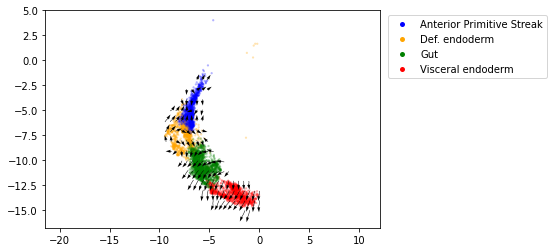

In [76]:
# we finally choose mode='gene', transfer mode='power10'

n_neighbors_list=[10]
add_amt_gene_list=[2000]

mode_list=['gene']
transfer_mode_list=['power10']

pca_n_components_list=[None] # 2d and 3d'
umap_n_list=[None]
umap_n_components_list=[None]

min_mass_list=[20]
grid_step_list=[20]

color_list_full=[solarExtra02]

tune_cell_velocity_curve(load_raw_data,load_cellDancer)



In [77]:
output_path

'/Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/detail_result/has_bin/cell_velocity'

In [78]:
embed_test=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/detail_result/has_bin/cell_velocity/velocity_embedding_tune_n10_gAmt2000_transferpower10_modegene_pcaNNone_umapNNone_umapNcomponentsNone_minMass20_grid_step20_colorful_grid_curve_arrow.csv',index_col =0)

In [66]:
load_raw_data[load_raw_data.gene_list=='Sox17']

,gene_list,u0,s0,cellID,clusters,embedding1,embedding2
0,Sox17,0.000000,4.357655,cell_12,Visceral endoderm,-2.112586,-12.874275
1,Sox17,0.000000,6.173903,cell_24,Visceral endoderm,-2.119421,-12.977172
2,Sox17,0.000000,3.421899,cell_64,Visceral endoderm,-1.581869,-13.631184
3,Sox17,0.000000,3.815380,cell_115,Visceral endoderm,-3.099537,-12.091047
4,Sox17,0.003503,3.731432,cell_167,Visceral endoderm,-1.553151,-13.578660
...,...,...,...,...,...,...,...
5061,Sox17,0.000000,2.013174,cell_139143,Gut,-6.202221,-9.662496
5062,Sox17,0.000000,0.466587,cell_139168,Def. endoderm,-8.622413,-8.895802
5063,Sox17,0.003974,1.272836,cell_139175,Gut,-5.593981,-9.050422
5064,Sox17,0.012555,3.308115,cell_139214,Gut,-4.722421,-10.669286


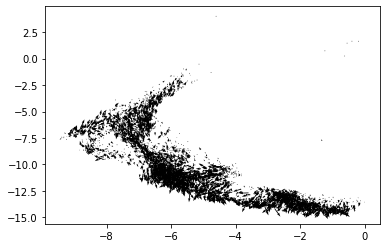

In [79]:
embed_test
plt.quiver(embed_test.embedding1,embed_test.embedding2,embed_test.embedding1_n10_gAmt2000,embed_test.embedding2_n10_gAmt2000)
plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/detail_result/has_bin/cell_velocity/velocity_embedding_tune_n10_gAmt2000_transferpower10_modegene_pcaNNone_umapNNone_umapNcomponentsNone_minMass20_grid_step20_colorful_grid_curve_arrow_draft.pdf')


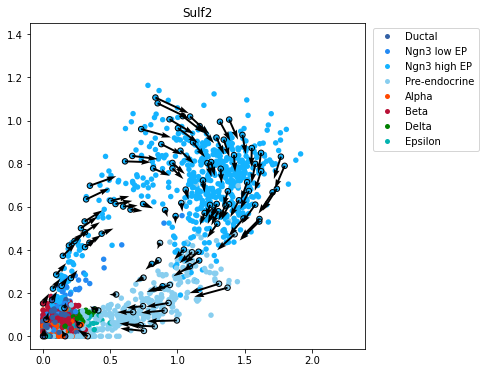

In [82]:
# load raw
raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/scv_data_full.csv"
load_raw_data = pd.read_csv(raw_data_path)

# gene velocity plot
load_cellDancer=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/combined_detail/combined_detail.csv')

color_list=solarExtra02.copy()

colors = {'Ductal':color_list[0],
                                            'Ngn3 low EP':color_list[1],
                                            'Ngn3 high EP':color_list[2],
                                            'Pre-endocrine':color_list[3],
                                            'Alpha':'#ff4800',
                                            'Beta':"#B81136",#'#ffb600',#'#f6ad2f',
                                            'Delta':'green',
                                            'Epsilon':'#03B3B0'#'#e05780'#'#fcf300'
                                                     }

four_samples=['Sulf2']

one_gene_raw=load_raw_data[load_raw_data.gene_list==load_raw_data.gene_list.iloc[0]]
cluster_info=one_gene_raw['clusters']
save_dir='/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/gene_velocity/'
for gene in four_samples:
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=save_dir+gene+'.pdf')

In [98]:
fold005=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_gene_marker/heatmap_df_after_p_and_fold_filter_fold_greater_0.05.csv')
fold005.gene_name

0        Krt8
1        Nfib
2      Shank2
3       Rbms3
4       Cyr61
        ...  
606    Mboat4
607      Tnik
608     Gstz1
609      Xkr6
610     Gnao1
Name: gene_name, Length: 611, dtype: object

In [ ]:
samples=['Dner','Btbd11','Jarid2','Rbfox3','Mtch1','Sel1l'] # CLS3
samples=['Map1b','Chga'] # CLS4
samples=['Gcg','Meis2','Smarca1'] # CLS5
samples=fold005.gene_name

# samples=['Sst','Asic2','Ppy'] # CLS7
# samples=['Ghrl','Maged2','Isl1'] # CLS8



for gene in samples:
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=save_dir+gene+'.pdf')

In [ ]:
''

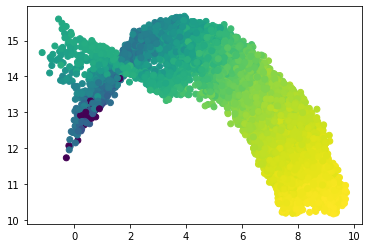

In [6]:
# Hba-x s0 in three clusters
load_raw_data_hba=load_raw_data[load_raw_data.gene_list.isin(['Hba-x'])].reset_index()
load_cellDancer_hba=load_cellDancer[load_cellDancer.gene_name.isin(['Hba-x'])].reset_index()
cell_keep=['Blood progenitors 2','Blood progenitors 1','Erythroid1']
load_raw_data_hba=load_raw_data_hba[load_raw_data_hba.clusters.isin(cell_keep)]
plt.scatter(load_raw_data_hba.embedding1, load_raw_data_hba.embedding2,c=np.log((load_raw_data_hba.s0+0.0001).to_numpy()))
# plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_level_s0/Hba-x_s0_21BP1_22BP2_23ERY1.pdf')

In [14]:
gene_list=load_cellDancer.gene_name.drop_duplicates()
for i,gene in enumerate(gene_list[2000:2001]):
    print(str(i)+gene)
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=save_dir+gene+'.pdf')

In [32]:
        
    def velocity_cell_map_curve_has_embedding(velocity_embedding, n_neighbors=200,add_amt_gene=2000,step=(60,60),save_path=None, save_csv=None,gene_list=None, custom_xlim=None,custom_ylim=None,colors=None,mode='embedding',pca_n_components=4,file_name_additional_info='',umap_n=10,transfer_mode=None,umap_n_components=None,min_mass=2,grid_steps=(30,30),alpha_inside=0.5,use_downsampling=True):
        from get_embedding import get_embedding

        """Cell velocity plot.

        TO DO: load_raw_data contains the cluster information, needs improve
        
        .. image:: https://user-images.githubusercontent.com/31883718/67709134-a0989480-f9bd-11e9-8ae6-f6391f5d95a0.png
        

        Arguments
        ---------
        adata: :class:`~anndata.AnnData`
            Annotated data matrix.
        density: `float` (default: 1)
            Amount of velocities to show - 0 none to 1 all
        arrow_size: `float` or triple `headlength, headwidth, headaxislength` (default: 1)
            Size of arrows.
        arrow_length: `float` (default: 1)
            Length of arrows.
        scale: `float` (default: 1)
            Length of velocities in the embedding.
        {scatter}

        Returns
        -------
        `matplotlib.Axis` if `show==False`
        """
        embedding=velocity_embedding.to_numpy()[:,0:2]
        sampling_ixs=range(0,embedding.shape[0])
        velocity_embedding=velocity_embedding.to_numpy()[:,2:4]

        if colors is not None:
            colors=colors
        else:
            colors = {'CA': grove2[7],
                    'CA1-Sub': grove2[9],
                    'CA2-3-4': grove2[8],
                    'Granule': grove2[6],
                    'ImmGranule1': grove2[6],
                    'ImmGranule2': grove2[6],
                    'Nbl1': grove2[5],
                    'Nbl2': grove2[5],
                    'nIPC': grove2[4],
                    'RadialGlia': grove2[3],
                    'RadialGlia2': grove2[3],
                    'GlialProg': grove2[2],
                    'OPC': grove2[1],
                    'ImmAstro': grove2[0]}
        pointsize = 5

        one_gene_raw = load_raw_data.gene_list[0]

        step_i = 25
        step_j = 25
        from matplotlib.patches import Patch
        from matplotlib.lines import Line2D

        def gen_Line2D(label, markerfacecolor):
            return Line2D([0], [0], color='w', marker='o', label=label, markerfacecolor=markerfacecolor,  markeredgewidth=0, markersize=5)

        legend_elements = []
        for i in colors:
            legend_elements.append(gen_Line2D(i, colors[i]))

        arrow_idx = sampling_neighbors(
            embedding[sampling_ixs, :], step_i=step_i, step_j=step_j)
            
        plt.figure()
        plt.scatter(embedding[:, 0],
                    embedding[:, 1],
                    c=load_raw_data[load_raw_data.gene_list ==
                                    one_gene_raw]['clusters'].map(colors),
                    s=pointsize,
                    # alpha=1,
                    # alpha=0.3,
                    # alpha=0.05,
                    alpha=alpha_inside,
                    edgecolor="none")

        # arrow all points

        # calculate_grid_arrows
        # Source - https://github.com/velocyto-team/velocyto.py/blob/0963dd2df0ac802c36404e0f434ba97f07edfe4b/velocyto/analysis.py
        def grid_curve(embedding, sampling_ixs, velocity_embedding):
            from scipy.stats import norm as normal
            import bezier
            # kernel grid plot

            def calculate_two_end_grid(embedding, sampling_ixs, velocity_embedding, smooth=None, steps=None, min_mass=None):
                def find_neighbors(data, n_neighbors, gridpoints_coordinates):
                    # data  = embedding[sampling_ixs, :]
                    nn = NearestNeighbors(
                        n_neighbors=n_neighbors, n_jobs=8)
                    nn.fit(data)
                    dists, neighs = nn.kneighbors(gridpoints_coordinates)
                    return(dists, neighs)
                # Prepare the grid
                grs = []
                for dim_i in range(embedding[sampling_ixs, :].shape[1]):
                    m, M = np.min(embedding[sampling_ixs, :][:, dim_i]) - \
                        0.2, np.max(
                            embedding[sampling_ixs, :][:, dim_i])-0.2
                    m = m - 0.025 * np.abs(M - m)
                    M = M + 0.025 * np.abs(M - m)
                    gr = np.linspace(m, M, steps[dim_i])
                    grs.append(gr)

                meshes_tuple = np.meshgrid(*grs)
                gridpoints_coordinates = np.vstack(
                    [i.flat for i in meshes_tuple]).T

                n_neighbors = int(velocity_embedding.shape[0]/3)
                dists_head, neighs_head = find_neighbors(
                    embedding[sampling_ixs, :], n_neighbors, gridpoints_coordinates)
                dists_tail, neighs_tail = find_neighbors(
                    embedding[sampling_ixs, :]+velocity_embedding, n_neighbors, gridpoints_coordinates)
                std = np.mean([(g[1] - g[0]) for g in grs])

                # isotropic gaussian kernel
                gaussian_w_head = normal.pdf(
                    loc=0, scale=smooth * std, x=dists_head)
                total_p_mass_head = gaussian_w_head.sum(1)
                gaussian_w_tail = normal.pdf(
                    loc=0, scale=smooth * std, x=dists_tail)
                total_p_mass_tail = gaussian_w_tail.sum(1)

                UZ_head = (velocity_embedding[neighs_head] * gaussian_w_head[:, :, None]).sum(
                    1) / np.maximum(1, total_p_mass_head)[:, None]  # weighed average
                UZ_tail = (velocity_embedding[neighs_tail] * gaussian_w_tail[:, :, None]).sum(
                    1) / np.maximum(1, total_p_mass_tail)[:, None]  # weighed average

                XY = gridpoints_coordinates

                dists_head2, neighs_head2 = find_neighbors(
                    embedding[sampling_ixs, :], n_neighbors, XY+UZ_head)
                dists_tail2, neighs_tail2 = find_neighbors(
                    embedding[sampling_ixs, :], n_neighbors, XY-UZ_tail)

                gaussian_w_head2 = normal.pdf(
                    loc=0, scale=smooth * std, x=dists_head2)
                total_p_mass_head2 = gaussian_w_head2.sum(1)
                gaussian_w_tail2 = normal.pdf(
                    loc=0, scale=smooth * std, x=dists_tail2)
                total_p_mass_tail2 = gaussian_w_tail2.sum(1)

                UZ_head2 = (velocity_embedding[neighs_head2] * gaussian_w_head2[:, :, None]).sum(
                    1) / np.maximum(1, total_p_mass_head2)[:, None]  # weighed average
                UZ_tail2 = (velocity_embedding[neighs_tail2] * gaussian_w_tail2[:, :, None]).sum(
                    1) / np.maximum(1, total_p_mass_tail2)[:, None]  # weighed average

                mass_filter = total_p_mass_head < min_mass

                # filter dots
                UZ_head_filtered = UZ_head[~mass_filter, :]
                UZ_tail_filtered = UZ_tail[~mass_filter, :]
                UZ_head2_filtered = UZ_head2[~mass_filter, :]
                UZ_tail2_filtered = UZ_tail2[~mass_filter, :]
                XY_filtered = XY[~mass_filter, :]
                return(XY_filtered, UZ_head_filtered, UZ_tail_filtered, UZ_head2_filtered, UZ_tail2_filtered, mass_filter, grs)

            XY_filtered, UZ_head_filtered, UZ_tail_filtered, UZ_head2_filtered, UZ_tail2_filtered, mass_filter, grs = calculate_two_end_grid(
                embedding, sampling_ixs, velocity_embedding, smooth=0.8, steps=grid_steps, min_mass=min_mass)

            # plt.quiver(XY_filtered[:, 0], XY_filtered[:, 1], UZ_head_filtered[:, 0], UZ_head_filtered[:, 1], zorder=20000, color='blue')
            # plt.quiver(XY_filtered[:, 0]-UZ_tail_filtered[:, 0], XY_filtered[:, 1]-UZ_tail_filtered[:, 1], UZ_tail_filtered[:, 0], UZ_tail_filtered[:, 1], zorder=20000, color='red')
            # plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/cell_velocity/two_end.pdf')

            #######################################################
            ############ connect two end grid to curve ############
            #######################################################
            n_curves = XY_filtered.shape[0]
            s_vals = np.linspace(0.0, 1.5, 15)
            ############ get longest distance len and norm ratio ############
            XYM = XY_filtered
            UVT = UZ_tail_filtered
            UVH = UZ_head_filtered
            UVT2 = UZ_tail2_filtered
            UVH2 = UZ_head2_filtered

            def norm_arrow_display_ratio(XYM, UVT, UVH, UVT2, UVH2, grs, s_vals):
                '''get the longest distance in prediction between the five points,
                and normalize by using the distance between two grids'''

                def distance(x, y):
                    # calc disctnce list between a set of coordinate
                    calculate_square = np.subtract(
                        x[0:-1], x[1:])**2 + np.subtract(y[0:-1], y[1:])**2
                    distance_result = (calculate_square)**0.5
                    return distance_result

                max_discance = 0
                for i in range(n_curves):
                    nodes = np.asfortranarray([[XYM[i, 0]-UVT[i, 0]-UVT2[i, 0], XYM[i, 0]-UVT[i, 0], XYM[i, 0], XYM[i, 0]+UVH[i, 0], XYM[i, 0]+UVH[i, 0]+UVH2[i, 0]],
                                                [XYM[i, 1]-UVT[i, 1]-UVT2[i, 1], XYM[i, 1]-UVT[i, 1], XYM[i, 1], XYM[i, 1]+UVH[i, 1], XYM[i, 1]+UVH[i, 1]+UVH2[i, 1]]])
                    curve = bezier.Curve(nodes, degree=4)
                    curve_dots = curve.evaluate_multi(s_vals)
                    distance_sum = np.sum(
                        distance(curve_dots[0], curve_dots[1]))
                    max_discance = max(max_discance, distance_sum)
                distance_grid = (
                    abs(grs[0][0]-grs[0][1]) + abs(grs[1][0]-grs[1][1]))/2
                print(max_discance)
                print(distance_grid)
                norm_ratio = distance_grid/max_discance
                print(norm_ratio)
                return(norm_ratio)

            norm_ratio = norm_arrow_display_ratio(
                XYM, UVT, UVH, UVT2, UVH2, grs, s_vals)
            ############ end --- get longest distance len and norm ratio ############

            ############ plot the curve arrow for cell velocity ############

            XYM = XY_filtered
            UVT = UZ_tail_filtered * norm_ratio
            UVH = UZ_head_filtered * norm_ratio
            UVT2 = UZ_tail2_filtered * norm_ratio
            UVH2 = UZ_head2_filtered * norm_ratio

            def plot_cell_velocity_curve(XYM, UVT, UVH, UVT2, UVH2, s_vals):
                plt.axis('equal')
                # TO DO: add 'colorful cell velocity' to here, now there is only curve arrows
                for i in range(n_curves):
                    nodes = np.asfortranarray([[XYM[i, 0]-UVT[i, 0]-UVT2[i, 0], XYM[i, 0]-UVT[i, 0], XYM[i, 0], XYM[i, 0]+UVH[i, 0], XYM[i, 0]+UVH[i, 0]+UVH2[i, 0]],
                                                [XYM[i, 1]-UVT[i, 1]-UVT2[i, 1], XYM[i, 1]-UVT[i, 1], XYM[i, 1], XYM[i, 1]+UVH[i, 1], XYM[i, 1]+UVH[i, 1]+UVH2[i, 1]]])
                    curve = bezier.Curve(nodes, degree=4)
                    curve_dots = curve.evaluate_multi(s_vals)
                    plt.plot(curve_dots[0], curve_dots[1],
                                linewidth=0.5, color='black', alpha=1)

                    # normalize the arrow of the last two points at the tail, to let all arrows has the same size in quiver
                    U = curve_dots[0][-1]-curve_dots[0][-2]
                    V = curve_dots[1][-1]-curve_dots[1][-2]
                    N = np.sqrt(U**2 + V**2)
                    U1, V1 = U/N*0.5, V/N*0.5  # 0.5 is to let the arrow have a suitable size
                    plt.quiver(curve_dots[0][-2], curve_dots[1][-2], U1, V1, units='xy', angles='xy',
                                scale=1, linewidth=0, color='black', alpha=1, minlength=0, width=0.1)

                # used to help identify arrow and line
                # plt.quiver(XY_filtered[:, 0], XY_filtered[:, 1], UZ_head_filtered[:, 0], UZ_head_filtered[:, 1], zorder=20000, color='blue',linewidth=0,alpha=0.2)
                # plt.quiver(XY_filtered[:, 0]-UZ_tail_filtered[:, 0], XY_filtered[:, 1]-UZ_tail_filtered[:, 1], UZ_tail_filtered[:, 0], UZ_tail_filtered[:, 1], zorder=20000, color='red',alpha=0.2)

            plot_cell_velocity_curve(XYM, UVT, UVH, UVT2, UVH2, s_vals)
            ############ end --- plot the curve arrow for cell velocity ############

        grid_curve(embedding, sampling_ixs, velocity_embedding)


        if custom_xlim is not None:
            plt.xlim(custom_xlim[0], custom_xlim[1])
            # plt.xlim(-23, 45) # for neurn dataset
        if custom_ylim is not None:
            plt.ylim(custom_ylim[0], custom_ylim[1])
        
        lgd=plt.legend(handles=legend_elements, bbox_to_anchor=(1.01, 1), loc='upper left')
        # plt.show()
        
        if save_path is not None:
            plt.savefig(os.path.join(save_path,('velocity_embedding_tune_n' + \
            str(n_neighbors)+'_gAmt'+str(add_amt_gene) + \
            file_name_additional_info+\
            '_colorful_grid_curve_arrow.pdf')),bbox_inches='tight',bbox_extra_artists=(lgd,),)
        if save_csv is not None:
            cell_velocity_df=pd.DataFrame({'embedding1':embedding[sampling_ixs, 0],
                         'embedding2':embedding[sampling_ixs, 1],
                         ('embedding1_n'+str(n_neighbors)+'_gAmt'+str(add_amt_gene)):velocity_embedding[:, 0],
                         ('embedding2_n'+str(n_neighbors)+'_gAmt'+str(add_amt_gene)):velocity_embedding[:, 1]})
            cell_velocity_df.to_csv(os.path.join(save_path,('velocity_embedding_tune_n' + \
            str(n_neighbors)+'_gAmt'+str(add_amt_gene) + \
            file_name_additional_info + \
            '_colorful_grid_curve_arrow.csv')))
        

In [ ]:
np